<a href="https://colab.research.google.com/github/pennapha12/Python_dataviz2024/blob/main/HW8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ตรวจสอบ path ใน Google Drive
path_to_movie = '/content/drive/MyDrive/for_work/basic_python/IMDb Movies India.csv'

In [ ]:
movie_df = pd.read_csv(path_to_movie, encoding='latin-1')
print(movie_df.shape)
movie_df.head()

(15509, 10)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
movie_df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
movie_df.shape

(15509, 10)

In [ ]:
# สร้าง list ของ genre ที่ต้องการ
genres_to_keep = ['Drama', 'Action', 'Fantasy', 'Comedy']

In [ ]:
# สร้าง mask เพื่อเลือกหนังที่มี genre ที่ต้องการ
mask = movie_df['Genre'].fillna('').apply(lambda x: any(genre in x for genre in genres_to_keep))

In [ ]:
# เลือกหนังที่ตรงกับเงื่อนไข
filtered_df = movie_df[mask]


In [ ]:
filtered_df.shape

(10444, 10)

In [ ]:
# ลบหนังซ้ำ
# ลบหนังซ้ำ
filtered_df = filtered_df.drop_duplicates(subset=['Genre']) # Changed 'Title' to 'Name'


In [ ]:
filtered_df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_Category,duration_minutes,Decade
2,#Homecoming,2021,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Drama,90.0,2010-2019
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,110.0,2010-2019
5,...Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,Drama,147.0,1980-1989
6,...Yahaan,2005,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,Drama,142.0,1990-1999
9,@Andheri,2014,116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,Action,116.0,2000-2009


In [ ]:
filtered_df.shape

(353, 10)

In [ ]:
def categorize_genre(genre):
  if 'Drama' in genre:
    return 'Drama'
  elif 'Action' in genre:
    return 'Action'
  elif 'Fantasy' in genre:
    return 'Fantasy'
  elif 'Comedy' in genre:
    return 'Comedy'
  else:
    return 'Other'

filtered_df['Genre_Category'] = filtered_df['Genre'].apply(categorize_genre)


In [ ]:
filtered_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_Category
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,Drama
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Drama
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,Drama
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,Drama
...,...,...,...,...,...,...,...,...,...,...,...
15033,Welcome 2 Karachi,(2015),131 min,"Action, Comedy, War",4.3,"1,123",Ashish R. Mohan,Arshad Warsi,Jackky Bhagnani,Lauren Gottlieb,Action
15113,World Cupp 2011,(2009),NaN,"Crime, Drama, Sport",3.5,26,Ravi Kapoor,Ravi Kapoor,Master Sagar Punjabi,Suresh Oberoi,Drama
15136,Yaadgaar,(1970),NaN,"Musical, Adventure, Drama",6.3,26,S. Ram Sharma,Nutan,Manoj Kumar,Pran,Drama
15291,Yeh Vaada Raha,(1982),138 min,"Romance, Musical, Drama",7.2,311,Kapil Kapoor,Rishi Kapoor,Tina Ambani,Poonam Dhillon,Drama


In [ ]:


def convert_duration_to_minutes(duration):
  try:
    # Split the string by space and take the first part
    duration_parts = duration.split(' ')
    # Extract the numerical part (assuming it's the first part)
    duration_number = int(duration_parts[0])
    return duration_number
  except:
    return None  # Return None if there's an error




In [ ]:
# สร้างคอลัมน์ใหม่
filtered_df['duration_minutes'] = filtered_df['Duration'].apply(convert_duration_to_minutes)
filtered_df['Genre_Category'].unique()

array(['Drama', 'Comedy', 'Action', 'Fantasy'], dtype=object)

In [ ]:
num_years = filtered_df['Year'].nunique()
print(f"มีทั้งหมด {num_years} ปี")


มีทั้งหมด 77 ปี


In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 353 entries, 0 to 15484
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              353 non-null    object 
 1   Year              335 non-null    object 
 2   Duration          265 non-null    object 
 3   Genre             353 non-null    object 
 4   Rating            285 non-null    float64
 5   Votes             285 non-null    object 
 6   Director          353 non-null    object 
 7   Actor 1           338 non-null    object 
 8   Actor 2           332 non-null    object 
 9   Actor 3           325 non-null    object 
 10  Genre_Category    353 non-null    object 
 11  duration_minutes  265 non-null    float64
dtypes: float64(2), object(10)
memory usage: 35.9+ KB


In [ ]:
filtered_df.sort_values(by=['Year'],ascending=False)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_Category,duration_minutes
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Drama,90.0
20,12 Bulbule,(2021),NaN,"Comedy, Drama, Family",NaN,NaN,Jagat Joon,Sonu Sonkar,Sunita Verman,Anubhav Dixit,Drama,NaN
11834,Red Mercury Mission in India,(2021),NaN,"Action, Crime, War",NaN,NaN,Maheshh,Sukesh,Trigger Ravi,Spurthi Rao,Action,NaN
9339,Minnal Murali,(2021),NaN,"Adventure, Comedy, Fantasy",NaN,NaN,Basil Joseph,Tovino Thomas,Basil Joseph,Aju Varghese,Fantasy,NaN
6958,Kaagaz,(2021),109 min,"Biography, Comedy, Drama",7.6,"6,738",Satish Kaushik,Pankaj Tripathi,Monal Gajjar,Satish Kaushik,Drama,109.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8614,Mahavir Karna,NaN,NaN,"Action, Adventure, War",NaN,NaN,R.S. Vimal,Vikram,Suresh Gopi,Jagan,Action,NaN
8833,Maniac 2: Hell is back,NaN,120 min,"Fantasy, Mystery, Thriller",NaN,NaN,Prashant Passy Pilley,Kunal Kapoor,Tia Bajpai,Manoj Joshi,Fantasy,120.0
9502,Mooso-the Mouse,NaN,89 min,"Drama, Western",NaN,NaN,Deepankar Prakash,Yashpal Sharma,Brijendra Kala,Rajendra Gupta,Drama,89.0
13984,The 13th Disciple,NaN,NaN,"Adventure, Fantasy, Horror",NaN,NaN,Robert Sigl,NaN,NaN,NaN,Fantasy,NaN


In [ ]:
#ลบปีที่เป็นค่าว่างออก
filtered_df = filtered_df.dropna(subset=['Year'])
filtered_df['Genre_Category'].unique()

array(['Drama', 'Comedy', 'Action', 'Fantasy'], dtype=object)

In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 2 to 15484
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Name              335 non-null    object  
 1   Year              335 non-null    int64   
 2   Duration          257 non-null    object  
 3   Genre             335 non-null    object  
 4   Rating            285 non-null    float64 
 5   Votes             285 non-null    object  
 6   Director          335 non-null    object  
 7   Actor 1           326 non-null    object  
 8   Actor 2           321 non-null    object  
 9   Actor 3           317 non-null    object  
 10  Genre_Category    335 non-null    object  
 11  duration_minutes  257 non-null    float64 
 12  Decade            334 non-null    category
dtypes: category(1), float64(2), int64(1), object(9)
memory usage: 34.7+ KB


In [ ]:
filtered_df.shape

(335, 13)

In [ ]:
filtered_df['Year'].sort_values(ascending=False)

,Year
2,2021
20,2021
11834,2021
9339,2021
6958,2021
...,...
35,1946
1612,1945
6367,1941
3950,1940


In [ ]:
print(filtered_df['Year'].unique())

[2021 2019 1997 2005 2014 2012 2018 1987 1958 2017 2010 2009 2002 1946
 1994 2007 2013 2003 2015 2006 1974 2011 1995 2016 1999 1973 2004 1977
 1975 1953 1947 1976 2000 1984 1989 1980 1964 1993 1961 1990 1992 1991
 1965 1983 1985 1957 1979 2001 1952 1966 1954 1967 1949 1972 1982 2020
 2008 1945 1963 1959 1981 1971 1998 1940 1956 1996 1962 1934 1988 1941
 1970 1960 1978 1948 1986 1969 1955]


In [ ]:
# ลบเครื่องหมายหรืออักขระที่ไม่ใช่ตัวเลข (เช่น วงเล็บ หรือข้อความอื่นๆ ถ้ามี)
# โดยทั่วไปเราจะใช้ regular expressions เพื่อจัดการค่าที่มีตัวเลขผสมกับตัวอักษร
filtered_df['Year'] = filtered_df['Year'].astype(str).str.extract('(\d{4})') # Changed this line
filtered_df['Genre_Category'].unique()

array(['Drama', 'Comedy', 'Action', 'Fantasy'], dtype=object)

In [ ]:
# แปลงคอลัมน์ Year จาก object เป็น int
filtered_df['Year'] = pd.to_numeric(filtered_df['Year'], errors='coerce')

In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 2 to 15484
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              335 non-null    object 
 1   Year              335 non-null    int64  
 2   Duration          257 non-null    object 
 3   Genre             335 non-null    object 
 4   Rating            285 non-null    float64
 5   Votes             285 non-null    object 
 6   Director          335 non-null    object 
 7   Actor 1           326 non-null    object 
 8   Actor 2           321 non-null    object 
 9   Actor 3           317 non-null    object 
 10  Genre_Category    335 non-null    object 
 11  duration_minutes  257 non-null    float64
dtypes: float64(2), int64(1), object(9)
memory usage: 34.0+ KB


In [ ]:
filtered_df['Genre_Category'].unique()

array(['Drama', 'Comedy', 'Action', 'Fantasy'], dtype=object)

In [ ]:
bins = [ 1939, 1949, 1959,1969,1979,1989,1999,2009,2019,2029]
labels = [ '1930-1939', '1940-1949','1950-1959','1960-1969','1970-1979','1980-1989','1990-1999','2000-2009','2010-2019'] # Removed one label to match the number of bins
filtered_df['Decade'] = pd.cut(filtered_df['Year'], bins=bins, labels=labels, right=False)

<ipython-input-95-d3cfdfd11a0f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Decade'] = pd.cut(filtered_df['Year'], bins=bins, labels=labels, right=False)


In [ ]:
filtered_df['Genre_Category'].unique()

array(['Drama', 'Comedy', 'Action', 'Fantasy'], dtype=object)

In [ ]:
filtered_df[filtered_df['Genre_Category'] == 'Action']


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_Category,duration_minutes,Decade
9,@Andheri,2014,116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,Action,116.0,2000-2009
26,13 May Gulaabi Nagar,2010,NaN,Action,NaN,NaN,N.K. Pareek,Nirmal Pandey,Khushi Rajpoot,Raj Singh Verma,Action,NaN,2000-2009
33,16 December,2002,158 min,"Action, Thriller",6.9,"1,235",Mani Shankar,Milind Soman,Danny Denzongpa,Gulshan Grover,Action,158.0,1990-1999
54,2.0,2018,148 min,"Action, Sci-Fi",6.2,"21,938",S. Shankar,Rajinikanth,Akshay Kumar,Amy Jackson,Action,148.0,2000-2009
100,5 Rifles,1974,134 min,"Action, Comedy",6.5,36,I.S. Johar,Rakesh Khanna,Rajesh Khanna,Ambika Johar,Action,134.0,1960-1969
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13100,Shootout at Lokhandwala,2007,122 min,"Action, Crime, History",7.1,"9,607",Apoorva Lakhia,Amitabh Bachchan,Sanjay Dutt,Sunil Shetty,Action,122.0,1990-1999
13469,Street Fighter: The Legend of Chun-Li,2009,96 min,"Action, Crime, Fantasy",3.7,"23,206",Andrzej Bartkowiak,Kristin Kreuk,Neal McDonough,Michael Clarke Duncan,Action,96.0,2000-2009
13607,Suraj,1966,155 min,"Romance, Musical, Action",6.7,124,T. Prakash Rao,Vyjayanthimala,Rajendra Kumar,Ajit,Action,155.0,1950-1959
14077,The Ghazi Attack,2017,116 min,"Action, Thriller, War",7.6,"12,367",Sankalp Reddy,Rana Daggubati,Kay Kay Menon,Atul Kulkarni,Action,116.0,2000-2009


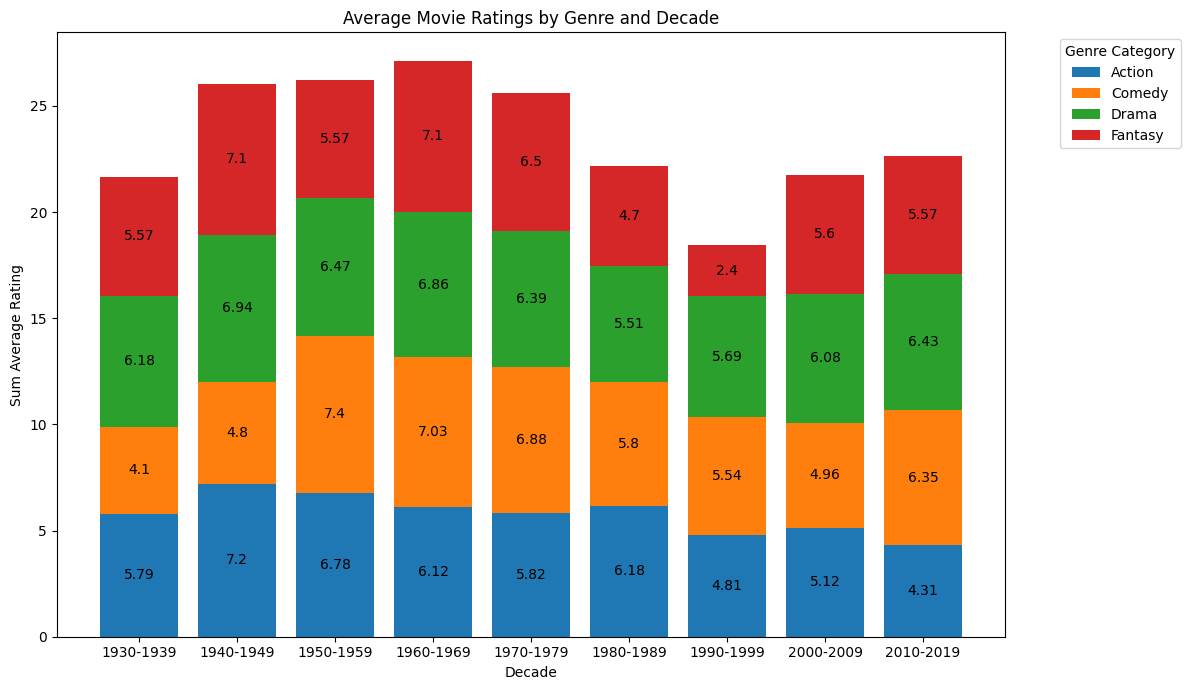

<ipython-input-98-028e0ce41a14>:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_decade_duration = filtered_df.groupby(['Decade', 'Genre_Category'])['duration_minutes'].mean().unstack().reset_index()


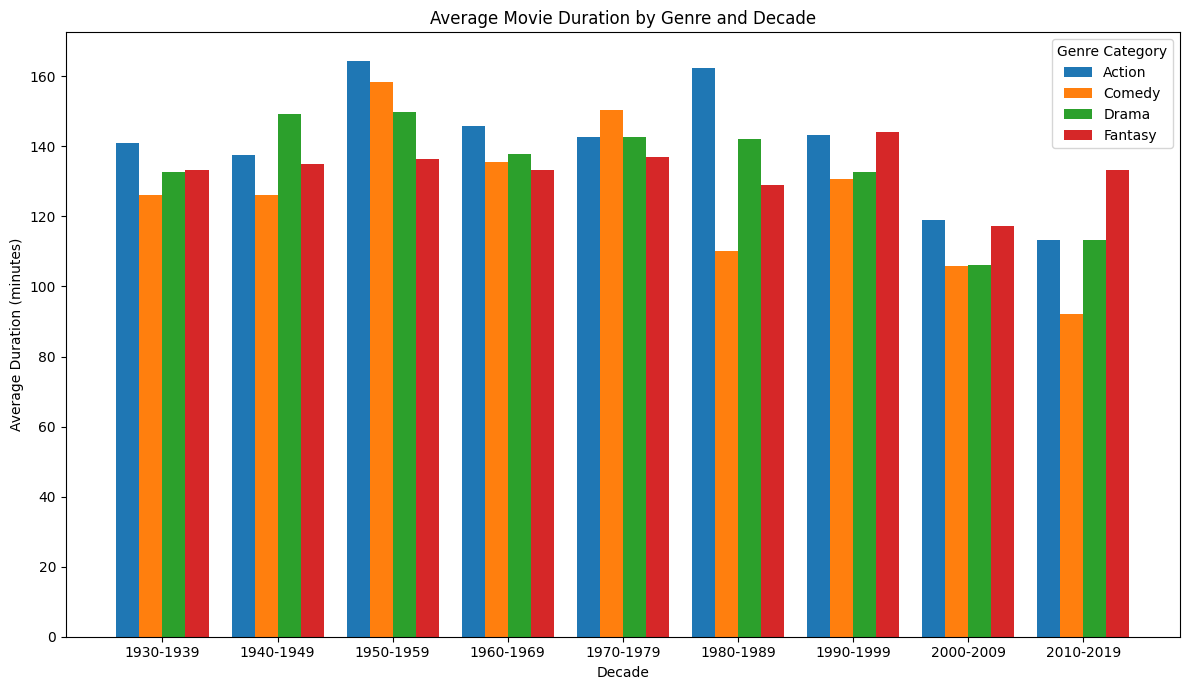

In [ ]:

# กรองเฉพาะประเภทหนังที่ต้องการ
genres_of_interest = ['Comedy', 'Drama', 'Action', 'Fantasy']
filtered_df = filtered_df[filtered_df['Genre_Category'].isin(genres_of_interest)]

# คำนวณค่าเฉลี่ย rating สำหรับแต่ละประเภทและแต่ละช่วง 10 ปี
genre_decade_rating = filtered_df.groupby(['Decade', 'Genre_Category'], observed=True)['Rating'].mean().unstack().reset_index()

# แทนที่ค่า NaN ด้วยค่าเฉลี่ยของแต่ละ Decade สำหรับแต่ละประเภทหนัง
# ใช้ mean() เฉพาะกับคอลัมน์ที่เป็นตัวเลข
for genre in genre_decade_rating.columns[1:]:
    genre_avg = genre_decade_rating[genre].mean()
    genre_decade_rating[genre].fillna(genre_avg, inplace=True)

# สร้างกราฟ
fig, ax = plt.subplots(figsize=(12, 7))

# กำหนดตำแหน่งของบาร์และความกว้างของบาร์
decades = genre_decade_rating['Decade']
genres = genre_decade_rating.columns[1:]  # ข้ามคอลัมน์ 'Decade'
width = 0.8
x = np.arange(len(decades))

# วาดกราฟแบบ stacked bar chart
bottoms = np.zeros(len(decades))  # ใช้สำหรับการสstack

for genre in genres:
    ax.bar(x, genre_decade_rating[genre], width, bottom=bottoms, label=genre)
    bottoms += genre_decade_rating[genre]  # อัพเดทตำแหน่งของ bottom สำหรับกราฟถัดไป

# ตั้งค่าต่าง ๆ
ax.set_xlabel('Decade')
ax.set_ylabel('Sum Average Rating')
ax.set_title('Average Movie Ratings by Genre and Decade')
ax.set_xticks(x)
ax.set_xticklabels(decades)
ax.legend(title='Genre Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# เพิ่มค่าเฉลี่ยบนบาร์
for i in range(len(decades)):
    total_height = 0
    for j, genre in enumerate(genres):
        yval = genre_decade_rating[genre].iloc[i]
        if not pd.isna(yval):  # แสดงค่าบนบาร์หากไม่ใช่ NaN
            total_height += yval
            ax.text(x[i], total_height - yval / 2, round(yval, 2), ha='center', va='center')

plt.tight_layout()
plt.show()

# กรองเฉพาะประเภทหนังที่ต้องการ
genres_of_interest = ['Comedy', 'Drama', 'Action', 'Fantasy']
filtered_df = filtered_df[filtered_df['Genre_Category'].isin(genres_of_interest)]

# คำนวณค่าเฉลี่ย duration สำหรับแต่ละประเภทและแต่ละช่วง 10 ปี
genre_decade_duration = filtered_df.groupby(['Decade', 'Genre_Category'])['duration_minutes'].mean().unstack().reset_index()

# แทนที่ค่า NaN ด้วยค่าเฉลี่ยของแต่ละประเภทหนัง
for genre in genre_decade_duration.columns[1:]:  # ข้ามคอลัมน์ 'Decade'
    genre_avg = genre_decade_duration[genre].mean()  # ค่าเฉลี่ยของแต่ละ genre
    genre_decade_duration[genre].fillna(genre_avg, inplace=True)

# สร้างกราฟ
fig, ax = plt.subplots(figsize=(12, 7))

# กำหนดตำแหน่งของบาร์และความกว้างของบาร์
decades = genre_decade_duration['Decade']
genres = genre_decade_duration.columns[1:]  # ข้ามคอลัมน์ 'Decade'
width = 0.2
x = np.arange(len(decades))

# วาดบาร์สำหรับแต่ละประเภทหนัง
for i, genre in enumerate(genres):
    ax.bar(x + i * width, genre_decade_duration[genre], width, label=genre)

# ตั้งค่าต่าง ๆ
ax.set_xlabel('Decade')
ax.set_ylabel('Average Duration (minutes)')
ax.set_title('Average Movie Duration by Genre and Decade')
ax.set_xticks(x + width * (len(genres) / 2 - 0.5))
ax.set_xticklabels(decades)
ax.legend(title='Genre Category')

'''
# เพิ่มค่าเฉลี่ยบนบาร์
for i in range(len(decades)):
    for j, genre in enumerate(genres):
        yval = genre_decade_duration[genre].iloc[i]
        if not pd.isna(yval):  # แสดงค่าบนบาร์หากไม่ใช่ NaN
            ax.text(x[i] + j*width, yval, round(yval, 2), va='bottom', ha='center')

'''

plt.tight_layout()
plt.show()



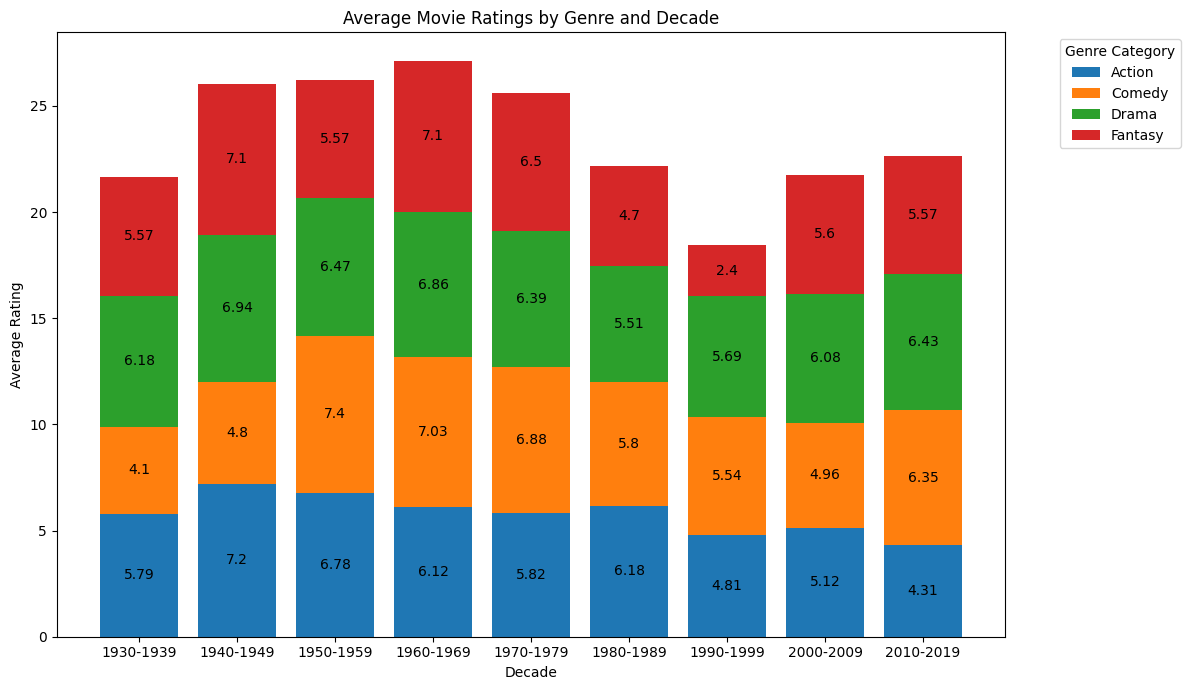

In [113]:
# กรองเฉพาะประเภทหนังที่ต้องการ
genres_of_interest = ['Comedy', 'Drama', 'Action', 'Fantasy']
filtered_df = filtered_df[filtered_df['Genre_Category'].isin(genres_of_interest)]

# คำนวณค่าเฉลี่ย rating สำหรับแต่ละประเภทและแต่ละช่วง 10 ปี
genre_decade_rating = filtered_df.groupby(['Decade', 'Genre_Category'], observed=True)['Rating'].mean().unstack().reset_index()

# แทนที่ค่า NaN ด้วยค่าเฉลี่ยของแต่ละ Decade สำหรับแต่ละประเภทหนัง
# ใช้ mean() เฉพาะกับคอลัมน์ที่เป็นตัวเลข
for genre in genre_decade_rating.columns[1:]:
    genre_avg = genre_decade_rating[genre].mean()
    genre_decade_rating[genre].fillna(genre_avg, inplace=True)

# สร้างกราฟ
fig, ax = plt.subplots(figsize=(12, 7))

# กำหนดตำแหน่งของบาร์และความกว้างของบาร์
decades = genre_decade_rating['Decade']
genres = genre_decade_rating.columns[1:]  # ข้ามคอลัมน์ 'Decade'
width = 0.8
x = np.arange(len(decades))

# วาดกราฟแบบ stacked bar chart
bottoms = np.zeros(len(decades))  # ใช้สำหรับการสstack

for genre in genres:
    ax.bar(x, genre_decade_rating[genre], width, bottom=bottoms, label=genre)
    bottoms += genre_decade_rating[genre]  # อัพเดทตำแหน่งของ bottom สำหรับกราฟถัดไป

# ตั้งค่าต่าง ๆ
ax.set_xlabel('Decade')
ax.set_ylabel('Average Rating')
ax.set_title('Average Movie Ratings by Genre and Decade')
ax.set_xticks(x)
ax.set_xticklabels(decades)
ax.legend(title='Genre Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# เพิ่มค่าเฉลี่ยบนบาร์
for i in range(len(decades)):
    total_height = 0
    for j, genre in enumerate(genres):
        yval = genre_decade_rating[genre].iloc[i]
        if not pd.isna(yval):  # แสดงค่าบนบาร์หากไม่ใช่ NaN
            total_height += yval
            ax.text(x[i], total_height - yval / 2, round(yval, 2), ha='center', va='center')

plt.tight_layout()
plt.show()


<ipython-input-100-2dcc589e0eba>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_decade_data = filtered_df.groupby(['Decade', 'Genre_Category'])[['Rating', 'duration_minutes']].mean().unstack()


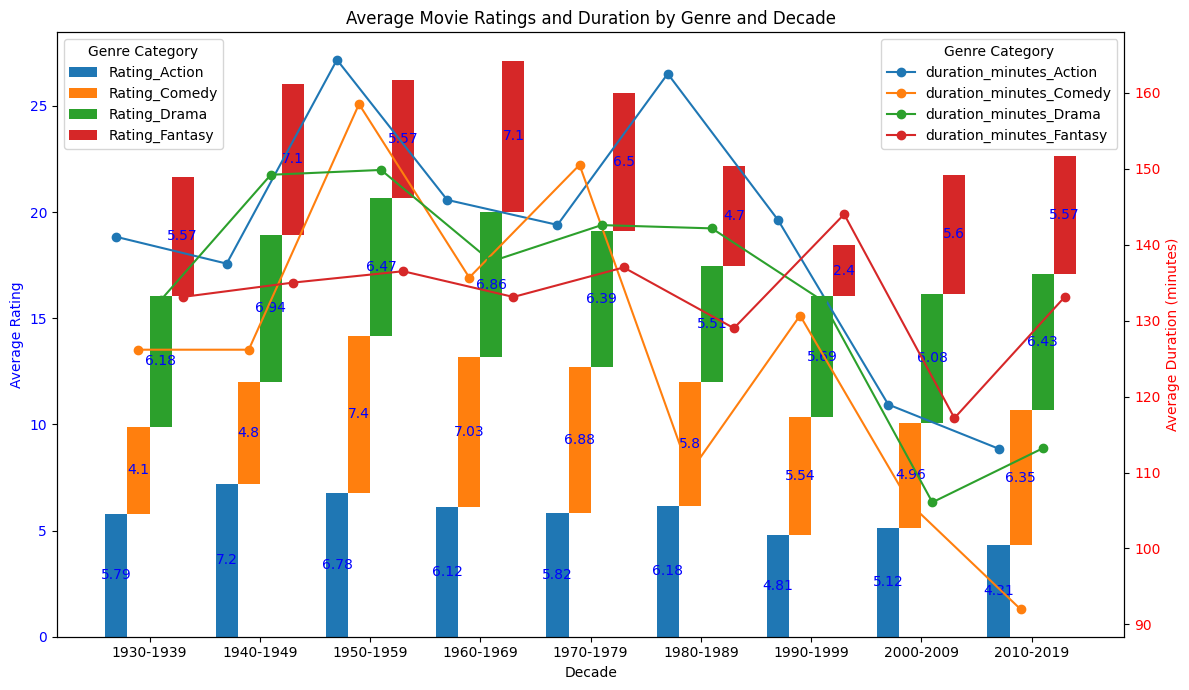

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# กรองเฉพาะประเภทหนังที่ต้องการ
genres_of_interest = ['Comedy', 'Drama', 'Action', 'Fantasy']
filtered_df = filtered_df[filtered_df['Genre_Category'].isin(genres_of_interest)]

# คำนวณค่าเฉลี่ย rating และ duration สำหรับแต่ละประเภทและแต่ละช่วง 10 ปี
genre_decade_data = filtered_df.groupby(['Decade', 'Genre_Category'])[['Rating', 'duration_minutes']].mean().unstack()

# Flatten the MultiIndex columns
genre_decade_data.columns = ['_'.join(col).strip() for col in genre_decade_data.columns.values]

# Reset index to have 'Decade' as a column
genre_decade_data = genre_decade_data.reset_index()

# แทนที่ค่า NaN ด้วยค่าเฉลี่ยของแต่ละ Decade สำหรับแต่ละประเภทหนัง
for genre in genre_decade_data.columns:
    if 'Rating' in genre or 'duration_minutes' in genre:
        genre_avg = genre_decade_data[genre].mean()
        genre_decade_data[genre].fillna(genre_avg, inplace=True)

# สร้างกราฟ
fig, ax1 = plt.subplots(figsize=(12, 7))

# กำหนดตำแหน่งของบาร์และความกว้างของบาร์
decades = genre_decade_data['Decade']
genres = [col for col in genre_decade_data.columns if 'Rating' in col]  # เลือกคอลัมน์ Rating
width = 0.2
x = np.arange(len(decades))

# วาดกราฟแบบ stacked bar chart สำหรับ Rating
bottoms = np.zeros(len(decades))  # ใช้สำหรับการ stack

for i, genre in enumerate(genres):
    ax1.bar(x + i * width, genre_decade_data[genre], width, bottom=bottoms, label=genre.replace('_Rating', ''), color=f'C{i}')
    bottoms += genre_decade_data[genre]  # อัพเดทตำแหน่งของ bottom สำหรับกราฟถัดไป

# ตั้งค่าต่าง ๆ สำหรับแกน Y แรก (Rating)
ax1.set_xlabel('Decade')
ax1.set_ylabel('Average Rating', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Average Movie Ratings and Duration by Genre and Decade')
ax1.set_xticks(x + width * (len(genres) / 2 - 0.5))
ax1.set_xticklabels(decades)
ax1.legend(title='Genre Category', loc='upper left')

# เพิ่มค่าเฉลี่ยบนบาร์
for i in range(len(decades)):
    total_height = 0
    for j, genre in enumerate(genres):
        yval = genre_decade_data[genre].iloc[i]
        if not pd.isna(yval):  # แสดงค่าบนบาร์หากไม่ใช่ NaN
            total_height += yval
            ax1.text(x[i] + j * width, total_height - yval / 2, round(yval, 2), ha='center', va='center', color='blue')

# สร้างแกน Y ที่สอง (Duration)
ax2 = ax1.twinx()

# เลือกคอลัมน์ duration_minutes
genres_duration = [col for col in genre_decade_data.columns if 'duration_minutes' in col]

# วาดกราฟแบบ line chart สำหรับ Duration
for i, genre in enumerate(genres_duration):
    ax2.plot(x + i * width, genre_decade_data[genre], marker='o', linestyle='-', color=f'C{i}', label=genre.replace('_duration_minutes', ''))

# ตั้งค่าต่าง ๆ สำหรับแกน Y ที่สอง (Duration)
ax2.set_ylabel('Average Duration (minutes)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(title='Genre Category', loc='upper right')

plt.tight_layout()
plt.show()
